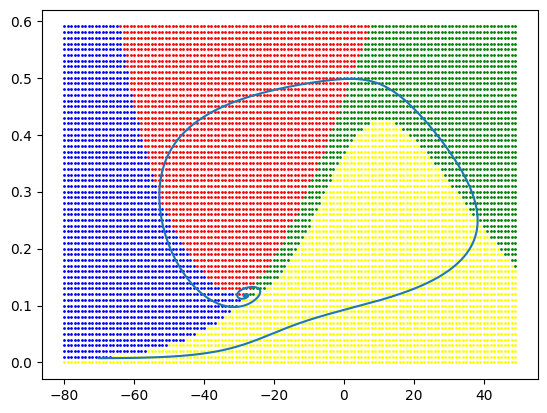

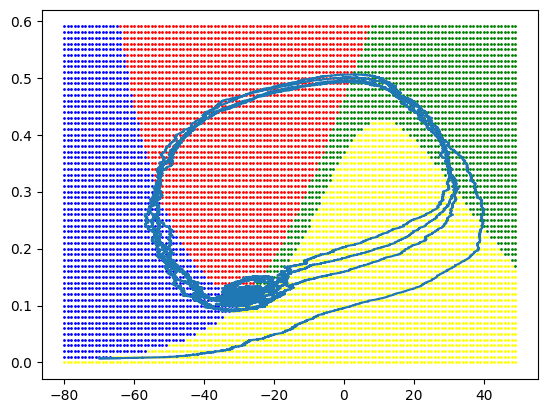

In [42]:
import matplotlib, math, numpy
def Morris_Lecar(Iapp, noisy = 0):
    phi = 0.04
    gCa = 4.4
    V3 = 2
    V4 = 30
    ECa = 120
    EK = -84
    EL = -60
    gK = 8
    gL = 2
    V1 = -1.2
    V2 = 18
    CM = 20

    dt = 0.01
    steps = 100000
    def minf(v):
        return (1 + math.tanh((v - V1) / V2)) / 2
    def taun(v):
        return 1 / math.cosh((v - V3) / (2 * V4))
    def ninf(v):
        return (1 + math.tanh((v - V3) / V4)) / 2
    def dv(v, w):
        return dt / CM * (Iapp - gL * (v - EL) - gK * w * (v - EK) - gCa * minf(v) * (v - ECa))
    def noisy_dv(v, w):
        return dv(v, w) + numpy.random.normal(0, dt ** 0.5, 1)[0]
    def dw(v, w):
        return dt * phi * (ninf(v) - w) / taun(v)
    v = -70
    w = 0.0075
    v_history = []
    w_history = []
    fig, ax = matplotlib.pyplot.subplots()
    for i in range(steps):
        v_history.append(v)
        w_history.append(w)
        if noisy:
            v += noisy_dv(v, w)
        else:
            v += dv(v, w)
        w += dw(v, w)
        #print(dv, dw)
    
    points = [[[] for i in range(2)] for j in range(4)]
    for i in range(-80, 50):
        for j in range(0, 60):
            v_ = i 
            w_ = j / 100
            points[(dv(v_, w_) > 0) * 2 + (dw(v_, w_) > 0)][0].append(v_)
            points[(dv(v_, w_) > 0) * 2 + (dw(v_, w_) > 0)][1].append(w_)
    for i, color in enumerate(['red', 'green', 'blue', 'yellow']):
            ax.scatter(points[i][0], points[i][1], c = color, s = 1)
    
            
    ax.plot(v_history, w_history)
    matplotlib.pyplot.show()
#Morris_Lecar(100)
Morris_Lecar(85, 0)
Morris_Lecar(85, 1)
